In [123]:
a = solve([cir1, y-0.105*(x)-1.133], [x,y])
print(a)

[(-1.76099845646052, 0.948095162071645), (1.52566302954230, 1.29319461810194)]


NameError: name 'loc' is not defined

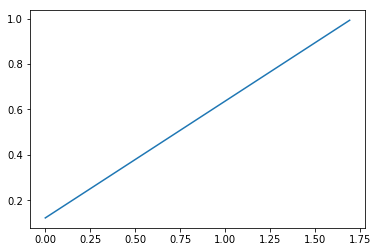

In [53]:
import math
from sympy import *
import matplotlib.pyplot as plt

def sol(a, b, m):
    if m > (-b/r2) :
        dic = solve([cir2, y-m*(x-a)-b], [x,y], dict = True)
        for i in range(0, len(dic)):
            if (dic[i][x] > 0 and dic[i][y] > 0):
                real_sol.append(dic[i])
                break
        return 0
    
    elif m < -sqrt((b/r1)**2 - 1) :
        dic = solve([cir1, y-m*(x-a)-b], [x,y], dict = True)
        for i in range(0, len(dic)):
            if (dic[i][x] > 0 and dic[i][y] > 0):
                real_sol.append(dic[i])
                break
        return 0

    else :
        dic = solve([y, y-m*(x-a)-b], [x,y], dict = True)
        real_sol.append(dic)
        return 1
            
    
def check(a, b, c, d) :
    theta = math.acos((c*(c-a)+d*(d-b))/(sqrt(c**2+d**2) * sqrt((c-a)**2 + (d-b)**2)))
    #print(theta)
    if theta >= critheta :
        return True
    else :
        return False

def before_cir():

    x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
    num=(L-(w/2)*(1/math.tan(math.radians(ina))))//(w*(1/math.tan(math.radians(ina))))#reflection number
    if num%2==1:
        x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
        y=x*math.tan(math.radians(ina))
        m=math.tan(math.radians(ina))
        return (0, y+r2, m)
    else:
        x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
        y=w-(x*math.tan(math.radians(ina)))
        m=-math.tan(math.radians(ina))
        return (0, y+r2, m)

def cal_m_bd(c, d, m) :
    if (c**2 + d**2 == r2**2):
        m2 = -d/(r2-c)
        tmp = solve([x**2 + y**2 - r1**2, (y-d)/(x-c) + x/y], [x,y], dict = True)
        for i in range(0, len(tmp)):
            if (tmp[i][x] > 0 and tmp[i][y] > 0):
                m_t = (d-tmp[i][y])/(c - tmp[i][x])
                m_s = d/(c-r1)
                if (m_t > m_s): 
                    return (m_t, m2)
                else :
                    return (m_s, m2)
        m_s = d/(c-r1)
        return(m_s, m2)
    else :
        m_t = -c/d
        m_s = -d/(r2-c)
        if (m_t < m_s):
            return (m_t, m_s)
        else:
            return (m_t, 99999)

def sol_aft(a, b, m, m1, m2):
    if m > m2 :
        dic = solve([cir2, y-m*(x-a)-b], [x,y], dict = True)
        for i in range(0, len(dic)):
            if (dic[i][x] > 0 and dic[i][y] > 0):
                real_sol.append(dic[i])
                break
        return 0
    
    elif m < m1 :
        dic = solve([cir1, y-m*(x-a)-b], [x,y], dict = True)
        print(dic)
        for i in range(0, len(dic)):
            if (dic[i][x] > 0 and dic[i][y] > 0):
                real_sol.append(dic[i])
                break
        return 0

    else :
        dic = solve([y, y-m*(x-a)-b], [x,y], dict = True)
        real_sol.append(dic)
        return 1
    
#user define
r1 = 1
r2 = 2
n1 = 1.48
n2 = 1.46
ina = 80 #incident angle
w = r1 - r2 #diameter of optical fiber 
L = 320 #distance from source to turn

x = Symbol('x')
y = Symbol('y')
critheta = math.asin(n2/n1)
cir1 = x**2 + y**2 - r1**2
cir2 = x**2 + y**2 - r2**2
real_sol = []

#First time
a = before_cir()[0]
b = before_cir()[1]
m = before_cir()[2]
if (sol(a, b, m) == 1):
    c = real_sol[0][0][x]
    d = real_sol[0][0][y]
    if (check(a, b, c, d)):
        plt.plot((a, b), (c, d))
        print("Sucess")
    else:
        print("NO total reflection")
else :
    plt.plot((a, b), (c, d))
    while (True):
        c = real_sol[0][x]
        d = real_sol[0][y]
        theta = math.acos((c*(c-a)+d*(d-b))/(sqrt(c**2+d**2) * sqrt((c-a)**2 + (d-b)**2)))
        m = ( (c-a)*math.sin(-(math.pi-2*theta)) + (d-b)*math.cos(-(math.pi-2*theta)) )/( (c-a)*math.cos(-(math.pi-2*theta)) + (d-b)*(-math.sin(-(math.pi-2*theta))) )
        a = real_sol[0][x]
        b = real_sol[0][y]
        real_sol = []
        if (sol_aft(a, b, m, cal_m_bd(c, d, m)[0], cal_m_bd(c, d, m)[1]) == 1) :
                c = real_sol[0][x]
                d = real_sol[0][y]
                plt.plot((a, b), (c, d))
                print("Sucess")
                break
        else :
            plt.plot((a, b), (real_sol[0][x], real_sol[0][y]))
            

#     a = sol_aft(c, d, m, cal_m_bd(c, d, m)[0], cal_m_bd(c, d, m)[1])
#     b = sol_aft(c, d, m, cal_m_bd(c, d, m)[0], cal_m_bd(c, d, m)[1])
#     if (check(c, d, a, b)):
#         theta = math.acos((c*(c-a)+d*(d-b))/(sqrt(c**2+d**2) * sqrt((c-a)**2 + (d-b)**2)))
#         m = ( (c-a)*math.sin(-(math.pi-2*theta)) + (d-b)*math.cos(-(math.pi-2*theta)) )/( (c-a)*math.cos(-(math.pi-2*theta)) + (d-b)*(-math.sin(-(math.pi-2*theta))) )
#     else :
#         print("END")
#     plt.plot((a, b), (real_sol[0][x], real_sol[0][y]))
#     real_sol = []


# plt.plot((a, b), (real_sol[0][x], real_sol[0][y]))
# print((a, b), (real_sol[0][x], real_sol[0][y]))

# if (sol(a, b, m) == 1):
#     print("Success")
# elif (len(real_sol) == 0) :
#     print("No Sol")
# else :
#     c = sol(a, b, m)[0][x]
#     d = sol(a, b, m)[0][y]
#     if (check(a, b, c, d)):
#         theta = math.acos((c*(c-a)+d*(d-b))/(sqrt(c**2+d**2) * sqrt((c-a)**2 + (d-b)**2)))
#         m = ( (c-a)*math.sin(-(math.pi-2*theta)) + (d-b)*math.cos(-(math.pi-2*theta)) )/( (c-a)*math.cos(-(math.pi-2*theta)) + (d-b)*(-math.sin(-(math.pi-2*theta))) )
#         print(m)
#     else :
#         print("??")
    
    

In [30]:
dic = solve([cir1, y-x], [x, y], dict = True)
for i in range(2):
    test = []
    if  (dic[i][x] > 0):
        test.append(dic[i])
print(test)
        


[{x: sqrt(2), y: sqrt(2)}]


In [52]:
print(real_sol)

[[{x: -0.321522059127658, y: 0.0}]]
